In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from plotutils import *
rc('text', usetex=True)

In [2]:
date = '09_21_2021'
tol = 1e-6

In [3]:
schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
schimdt_time = collect_time(schimdt)

schimdt-1.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  5
schimdt-10.0
 72/72 instances terminate with status:  0
schimdt-100.0
 72/72 instances terminate with status:  0
schimdt-1000.0
 72/72 instances terminate with status:  0
schimdt-10000.0
 72/72 instances terminate with status:  0


In [4]:
lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
lee_time = collect_time(lee)

lee-0.1
 69/72 instances terminate with status:  0
  3/72 instances terminate with status:  5
lee-0.2
 69/72 instances terminate with status:  0
  3/72 instances terminate with status:  5
lee-0.3
 69/72 instances terminate with status:  0
  3/72 instances terminate with status:  5
lee-0.4
 69/72 instances terminate with status:  0
  3/72 instances terminate with status:  5
lee-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  5


In [5]:
yd = get_all(logdir='../IPG/test/log', date=date, inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
yd_time = collect_time(yd)

yd-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  5
yd-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  5
yd-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  5
yd-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  5
yd-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  5


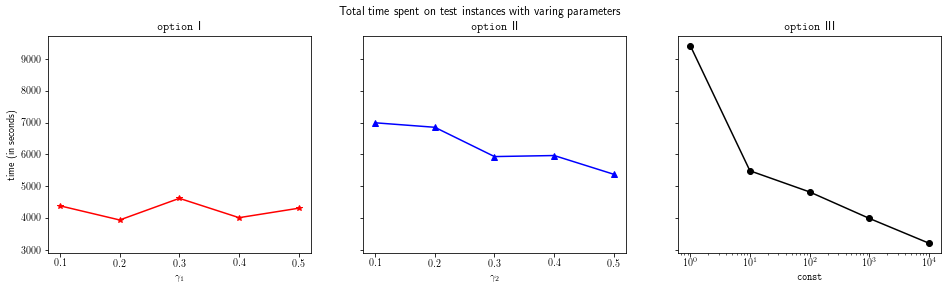

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Total time spent on test instances with varing parameters')
ax1.plot([0.1, 0.2, 0.3, 0.4, 0.5], yd_time, 'r-*')
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.plot([0.1, 0.2, 0.3, 0.4, 0.5], lee_time, 'b-^')
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_title(r'\texttt{option} II')
ax3.plot([1e0, 1e1, 1e2, 1e3, 1e4], schimdt_time, 'k-o')
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xscale('log')
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_sensitivity.pdf", dpi=300)

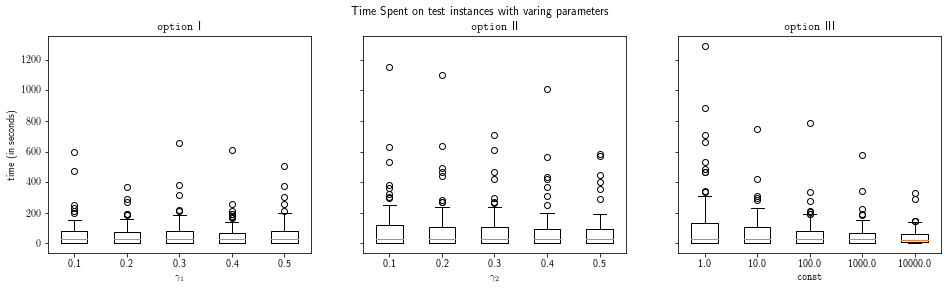

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Time Spent on test instances with varing parameters')
ax1.boxplot(prepare_box(yd))
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.boxplot(prepare_box(lee))
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax2.set_title(r'\texttt{option} II')
ax3.boxplot(prepare_box(schimdt))
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xticklabels([1e0, 1e1, 1e2, 1e3, 1e4])
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_hist.pdf", dpi=300)

## Morales Plots

In [9]:
# schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[ 1e1, 1e2, 1e3, 1e4])
ppf = PerformanceProfile(schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: schimdt-10000.0


In [10]:
# lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(lee)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
lee_best = get_best(pools)
print('Best params:', lee_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: lee-0.5


In [11]:
# yd = get_all(logdir='../IPG/test/log', date=date, inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(yd)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
yd_best = get_best(pools)
print('Best params:', yd_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: yd-0.2


In [12]:
cols = ['datasetid', 'F', 'time', 'nz']
schimdt_df = schimdt[schimdt_best][cols].copy()
lee_df = lee[lee_best][cols].copy()
yd_df = yd[yd_best][cols].copy()

def pair_wise_comparison(df1, df2, suffixes_lst):
    df12_merged = pd.merge(df1, df2, on='datasetid', 
                           suffixes=(suffixes_lst[0], suffixes_lst[1]), how='left')
    better12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) > 0 )
    same12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) == 0 ) 
    worse12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) < 0 ) 
    
    better12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) < -1e-8 )
    same12_F = np.sum(np.abs(df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) <=1e-8 ) 
    worse12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) > 1e-8 )     

    print(f"For {suffixes_lst[0]}-{suffixes_lst[1]} comparsion:\n==========================")
    print(" In terms final F:")
    print(f"  better:{better12_F} | same:{same12_F} | worse: {worse12_F}")
    print(" In terms #z:")
    print(f"  better:{better12_z} | same:{same12_z} | worse: {worse12_z}")
    return better12_z, same12_z, worse12_z, better12_F, same12_F, worse12_F

In [13]:
pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

For yd-lee comparsion:
 In terms final F:
  better:0 | same:71 | worse: 1
 In terms #z:
  better:1 | same:68 | worse: 3


(1, 68, 3, 0, 71, 1)

In [14]:
pair_wise_comparison(yd_df, schimdt_df, suffixes_lst=['yd', 'schimdt'])

For yd-schimdt comparsion:
 In terms final F:
  better:0 | same:71 | worse: 1
 In terms #z:
  better:4 | same:66 | worse: 2


(4, 66, 2, 0, 71, 1)

In [15]:
pair_wise_comparison(lee_df, schimdt_df, suffixes_lst=['lee', 'schimdt'])

For lee-schimdt comparsion:
 In terms final F:
  better:1 | same:71 | worse: 0
 In terms #z:
  better:7 | same:63 | worse: 2


(7, 63, 2, 1, 71, 0)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
yd-0.2 Win:35 | Lose:37
yd-0.2 Win:50 | Lose:22
lee-0.5 Win:47 | Lose:25


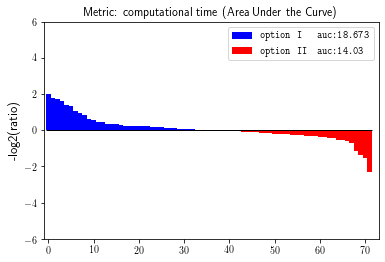

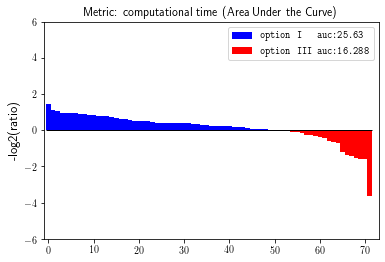

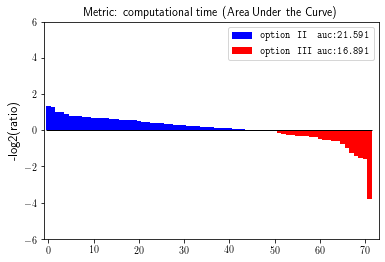

In [16]:
final = {}
final[yd_best] = yd[yd_best]
final[lee_best] = lee[lee_best]
final[schimdt_best] = schimdt['schimdt-1000.0']
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

In [37]:
# yd['yd-0.1'][yd['yd-0.1']['status'] != 0]
# cat ../IPG/test/log/09_10_2021/yd/logit/logfile/0.01_10_0.1_0.1/w8a.txt

In [21]:
# cat ../IPG/test/log/09_10_2021/yd/logit/logfile/0.1_100_0.3_0.1/duke.txt

In [1]:
cat ../IPG/test/log/09_11_2021/yd/logit/logfile/0.1_100_0.3_0.1/duke.txt


       Inexact Proximal Gradient Type Method   (version:0.1 (2021-08-29))  
Problem Summary: Excuted at 2021-9-10 21:50
Dataset:./log/09_11_2021/yd/logit/logfile/0.1_100_0.3_0.1/duke
Data Size:......................................n=44, p=7129
Loss Function:..................................Logistic
Regularizer:....................................Overlapping Group L1
Penalty Parameter:..............................lambda=0.0106
Number of groups:.............................102

Algorithm Parameters:
Termination Conditions: accuracy: 1e-06 | time limits:7200 | iteration limits:10000
Inexact Strategy: yd: gamma:1.000e-01
Lineserch Parameters: eta:1e-05 | xi:0.5 | beta:1.1
Proximal Stepsize update: heuristic
****************************************************************************************************
 Iters.   Obj.    alphak   |  aoptim   its.   Flag  Stepsize  baks    Gap       tarGap    #pz  #pnz | baks    stepsize  |dtaken| |
     0 6.931e-01 1.000e+00 | 6.042e+00    1 desired 

In [2]:
cat ../IPG/test/log/09_10_2021/lee/logit/logfile/0.1_100_0.3_0.1/duke.txt


       Inexact Proximal Gradient Type Method   (version:0.1 (2021-08-29))  
Problem Summary: Excuted at 2021-9-10 13:55
Dataset:./log/09_10_2021/lee/logit/logfile/0.1_100_0.3_0.1/duke
Data Size:......................................n=44, p=7129
Loss Function:..................................Logistic
Regularizer:....................................Overlapping Group L1
Penalty Parameter:..............................lambda=0.0106
Number of groups:.............................102

Algorithm Parameters:
Termination Conditions: accuracy: 1e-06 | time limits:7200 | iteration limits:10000
Inexact Strategy: lee: gamma:1.000e-01
Lineserch Parameters: eta:1e-05 | xi:0.5 | beta:1.1
Proximal Stepsize update: heuristic
****************************************************************************************************
 Iters.   Obj.    alphak   |  aoptim   its.   Flag  Stepsize  baks    Gap       tarGap    #pz  #pnz | baks    stepsize  |dtaken| |
     0 6.931e-01 1.000e+00 | 6.042e+00    1 desire

In [1]:
cat ../IPG/test/log/09_21_2021/schimdt/logit/logfile/0.1_100_0.3_1000.0/duke.txt


       Inexact Proximal Gradient Type Method   (version:0.1 (2021-09-20))  
Problem Summary: Excuted at 2021-9-20 18:18
Dataset:./log/09_21_2021/schimdt/logit/logfile/0.1_100_0.3_1000.0/duke
Data Size:......................................n=44, p=7129
Loss Function:..................................Logistic
Regularizer:....................................Overlapping Group L1
Penalty Parameter:..............................lambda=0.0106
Number of groups:.............................102

Algorithm Parameters:
Termination Conditions: accuracy: 1e-06 | time limits:7200 | iteration limits:10000
Inexact Strategy: schimdt: delta:3.000e+00 | c:1.000e+03
Lineserch Parameters: eta:1e-05 | xi:0.5 | beta:1.1
Proximal Stepsize update: heuristic
****************************************************************************************************
 Iters.   Obj.    alphak   |  aoptim   its.   Flag  Stepsize  baks    Gap       tarGap    #pz  #pnz | baks    stepsize  |dtaken| |
     0 6.931e-01 1.000e+0

   376 2.949e-01 1.372e-02 | 9.227e-04    1 desired 5.054e+00    0 +3.867e-06 +1.866e-05   22    80 |    0   1.000e+00 9.227e-04 |
   377 2.949e-01 1.510e-02 | 9.509e-04    1 desired 5.054e+00    0 +7.696e-06 +1.852e-05   22    80 |    0   1.000e+00 9.509e-04 |
   378 2.948e-01 1.661e-02 | 1.062e-03    1 desired 5.054e+00    0 +4.594e-06 +1.837e-05   22    80 |    0   1.000e+00 1.062e-03 |
   379 2.948e-01 1.827e-02 | 1.273e-03    1 desired 5.054e+00    0 +1.548e-05 +1.822e-05   22    80 |    0   1.000e+00 0.000e+00 |
   380 2.948e-01 1.461e-02 | 1.008e-03    1 desired 5.054e+00    0 +8.108e-06 +1.808e-05   22    80 |    0   1.000e+00 1.008e-03 |
   381 2.947e-01 1.608e-02 | 1.091e-03    1 desired 5.054e+00    0 +8.975e-06 +1.794e-05   22    80 |    0   1.000e+00 0.000e+00 |
   382 2.947e-01 1.286e-02 | 8.648e-04    1 desired 5.054e+00    0 +4.573e-06 +1.780e-05   22    80 |    0   1.000e+00 8.648e-04 |
   383 2.947e-01 1.415e-02 | 8.517e-04    1 desired 5.054e+00    0 +4.655e-06 +1.76

  3409 2.766e-01 1.618e-01 | 3.399e-06    2 desired 5.252e+00    0 +1.413e-08 +2.522e-08   84    18 |    0   1.000e+00 3.399e-06 |
  3410 2.766e-01 1.780e-01 | 4.025e-06    1 desired 5.252e+00    0 +3.134e-09 +2.520e-08   85    17 |    0   1.000e+00 4.025e-06 |
  3411 2.766e-01 1.958e-01 | 4.282e-06    2 desired 2.888e+00    1 +3.597e-09 +2.518e-08   84    18 |    0   1.000e+00 4.282e-06 |
  3412 2.766e-01 2.154e-01 | 5.083e-06    1 desired 2.888e+00    0 +1.917e-08 +2.515e-08   85    17 |    0   1.000e+00 0.000e+00 |
  3413 2.766e-01 1.723e-01 | 3.918e-06    1 desired 2.888e+00    0 +3.566e-09 +2.513e-08   85    17 |    0   1.000e+00 0.000e+00 |
  3414 2.766e-01 1.379e-01 | 3.140e-06    1 desired 2.888e+00    0 +1.774e-09 +2.511e-08   85    17 |    0   1.000e+00 3.140e-06 |
  3415 2.766e-01 1.517e-01 | 3.807e-06    1 desired 2.888e+00    0 +1.104e-08 +2.509e-08   85    17 |    0   1.000e+00 0.000e+00 |
  3416 2.766e-01 1.213e-01 | 2.747e-06    2 desired 3.177e+00    0 +1.865e-08 +2.50

In [2]:
cat ../IPG/test/log/09_21_2021/yd/logit/logfile/0.1_100_0.3_0.4/duke.txt


       Inexact Proximal Gradient Type Method   (version:0.1 (2021-09-20))  
Problem Summary: Excuted at 2021-9-20 18:45
Dataset:./log/09_21_2021/yd/logit/logfile/0.1_100_0.3_0.4/duke
Data Size:......................................n=44, p=7129
Loss Function:..................................Logistic
Regularizer:....................................Overlapping Group L1
Penalty Parameter:..............................lambda=0.0106
Number of groups:.............................102

Algorithm Parameters:
Termination Conditions: accuracy: 1e-06 | time limits:7200 | iteration limits:10000
Inexact Strategy: yd: gamma:4.000e-01
Lineserch Parameters: eta:1e-05 | xi:0.5 | beta:1.1
Proximal Stepsize update: heuristic
****************************************************************************************************
 Iters.   Obj.    alphak   |  aoptim   its.   Flag  Stepsize  baks    Gap       tarGap    #pz  #pnz | baks    stepsize  |dtaken| |
     0 6.931e-01 1.000e+00 | 6.042e+00    1 desired 

   971 2.770e-01 2.472e-01 | 1.936e-03    5 desired 2.207e+00    1 +2.762e-07 +3.089e-06   88    14 |    1   5.000e-01 9.682e-04 |
   972 2.770e-01 1.977e-01 | 9.725e-04    5 desired 3.231e+00    0 +6.397e-07 +1.207e-06   88    14 |    0   1.000e+00 9.725e-04 |
   973 2.770e-01 2.175e-01 | 1.189e-03    3 desired 3.910e+00    0 +7.074e-07 +1.509e-06   88    14 |    0   1.000e+00 1.189e-03 |
   974 2.770e-01 2.393e-01 | 1.596e-03    4 desired 2.365e+00    1 +1.054e-06 +2.248e-06   86    16 |    1   5.000e-01 7.982e-04 |
   975 2.770e-01 1.914e-01 | 8.751e-04    4 desired 3.148e+00    0 +7.280e-07 +1.036e-06   88    14 |    0   1.000e+00 8.751e-04 |
   976 2.770e-01 2.106e-01 | 1.034e-03    3 desired 3.809e+00    0 +1.636e-07 +1.215e-06   88    14 |    0   1.000e+00 1.034e-03 |
   977 2.770e-01 2.316e-01 | 1.340e-03    3 desired 2.305e+00    1 +4.458e-07 +1.693e-06   88    14 |    0   1.000e+00 1.340e-03 |
   978 2.770e-01 2.548e-01 | 1.925e-03    4 desired 3.068e+00    0 +2.054e-06 +2.85

In [3]:
cat ../IPG/test/log/09_21_2021/yd/logit/logfile/0.1_100_0.3_0.5/duke.txt


       Inexact Proximal Gradient Type Method   (version:0.1 (2021-09-20))  
Problem Summary: Excuted at 2021-9-20 18:46
Dataset:./log/09_21_2021/yd/logit/logfile/0.1_100_0.3_0.5/duke
Data Size:......................................n=44, p=7129
Loss Function:..................................Logistic
Regularizer:....................................Overlapping Group L1
Penalty Parameter:..............................lambda=0.0106
Number of groups:.............................102

Algorithm Parameters:
Termination Conditions: accuracy: 1e-06 | time limits:7200 | iteration limits:10000
Inexact Strategy: yd: gamma:5.000e-01
Lineserch Parameters: eta:1e-05 | xi:0.5 | beta:1.1
Proximal Stepsize update: heuristic
****************************************************************************************************
 Iters.   Obj.    alphak   |  aoptim   its.   Flag  Stepsize  baks    Gap       tarGap    #pz  #pnz | baks    stepsize  |dtaken| |
     0 6.931e-01 1.000e+00 | 6.042e+00    1 desired 

  1577 2.766e-01 2.781e-01 | 4.162e-05   10 desired 3.726e+00    0 +1.121e-09 +1.147e-09   85    17 |    0   1.000e+00 4.162e-05 |
  1578 2.766e-01 3.059e-01 | 5.185e-05    9 desired 1.815e+00    2 +1.118e-09 +1.415e-09   85    17 |    0   1.000e+00 5.185e-05 |
  1579 2.766e-01 3.365e-01 | 7.624e-05    8 desired 1.768e+00    1 +2.132e-09 +2.373e-09   85    17 |    1   5.000e-01 3.812e-05 |
  1580 2.766e-01 2.692e-01 | 3.716e-05  274 desired 4.710e+00   32 +9.838e-10 +9.840e-10   85    17 |    0   1.000e+00 3.716e-05 |
  1581 2.766e-01 2.961e-01 | 4.607e-05    8 desired 1.897e+00    2 +1.110e-09 +1.211e-09   85    17 |    0   1.000e+00 4.607e-05 |
  1582 2.766e-01 3.257e-01 | 6.194e-05    7 desired 1.680e+00    1 +1.535e-09 +1.713e-09   85    17 |    1   5.000e-01 3.097e-05 |
  1583 2.766e-01 2.606e-01 | 3.341e-05  677 desired 2.879e+00   82 +8.543e-10 +8.543e-10   85    17 |    0   1.000e+00 3.341e-05 |
  1584 2.766e-01 2.866e-01 | 3.838e-05   10 desired 3.086e+00    1 +8.962e-10 +9.08